In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
from scipy.stats import f_oneway,pearsonr,chi2_contingency,spearmanr
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
# load dataset
from plotly.express import data
tips_data = data.tips()
tips_data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#SPENDING BY DAY AND SEX

fig1 = px.scatter(tips_data, x="day", y="total_bill", color="sex", title="Spending by Day and Sex (Scatter Plot)")
fig1.update_layout(xaxis_title="Day of the Week", yaxis_title="Total Bill")
fig1.show()

In [ ]:
# INSPECT WHETHER THE AMOUNT A CUSTOMER DECIDES TO SPEND IS IMPACTED BY The day they comeS in

In [ ]:
# SET THE HYPOTHESIS

Ho = 'customer spending is not impacted by the day they come in'
H1 = 'customer spending is impacted by the day they come in'

## Choose level of significance
alpha = 0.05

# set the decision rule

def decision(p_value:float):

    if p_value < alpha:
        result = H1
    else:
        result = Ho
    return f'{result} because pvalue = {round(p_value, 4)}'

# compute the test

model = ols(formula = 'total_bill ~ day', data = tips_data).fit()
day_anova_table = anova_lm(model)
day_pvalue = day_anova_table['PR(>F)'].loc['day']

# decision
decision(day_pvalue)



'customer spending is impacted by the day they come in because pvalue = 0.0425'

In [ ]:
# SUPPOSE YOU ARE SPENDING BY TIME

fig2 = px.histogram(tips_data, x = 'time', y = 'total_bill', title = 'Spending Distribution by Time (Histogram)', color = 'day', nbins = 10)

# Adjust spacing between bars for better readability
fig2.update_layout(bargap=0.1)  

fig2.show()

In [ ]:
# SUPPOSE YOU ARE TO SPEND BY TABLE SIZE

fig3 = px.bar(tips_data, x='size', y='total_bill', title='Spending by Table Size (Bar Chart)')
fig3.show()

In [ ]:
# inspect if there is relationship between tips given by customer

Ho = 'there is no relationship between the amount spent by the customer and the tips they give waiter'
H1 = 'there is  relationship between the amount spent by the customer and the tips they give waiter'

# Perform the correlation test
corr_coeff, corr_pvalue = spearmanr(tips_data['total_bill'].values, tips_data['tip'].values)

decision(p_value=corr_pvalue)

'there is  relationship between the amount spent by the customer and the tips they give waiter because pvalue = 0.0'

Text(0, 0.5, 'Tip Amount')

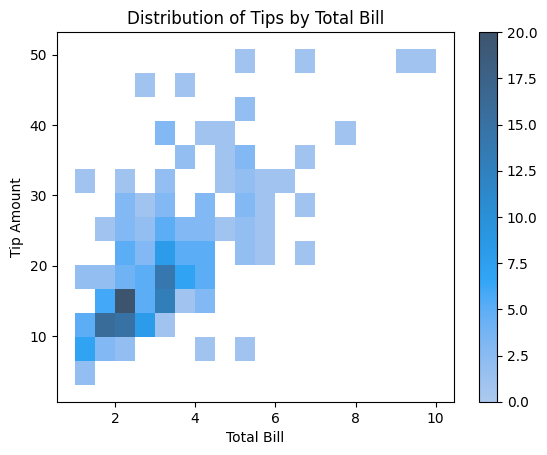

In [20]:
sns.histplot(data=tips_data, x='tip', y='total_bill', cbar=True)
plt.title("Distribution of Tips by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")